In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ekenv import EKGame
import random

In [98]:
# card_states = []
history_states = []

In [99]:
g = EKGame()
while len(history_states) < 20:

    num_players = 5
    g.reset(num_players)

    still_playing = np.sum(g.still_playing)

    while np.sum(g.still_playing) > 1:
        [player, reward, cards, history, actions] = g.update_and_get_state(False)

        if random.random() < 1 / 1000 and len(history) == 10:
            history_states += [history]
            print(f"Adding random state ({len(history_states)}/20)")

        player_dead = len(actions) == 0
        actions = g.get_legal_actions(True)
        
        new_still_playing = np.sum(g.still_playing)

        if player_dead:
            continue

        options = np.where(actions == 1)[0]
        pick = random.choice(options).item()

        g.take_action(player, pick)

Adding random state (1/20)
Adding random state (2/20)
Adding random state (3/20)
Adding random state (4/20)
Adding random state (5/20)
Adding random state (6/20)
Adding random state (7/20)
Adding random state (8/20)
Adding random state (9/20)
Adding random state (10/20)
Adding random state (11/20)
Adding random state (12/20)
Adding random state (13/20)
Adding random state (14/20)
Adding random state (15/20)
Adding random state (16/20)
Adding random state (17/20)
Adding random state (18/20)
Adding random state (19/20)
Adding random state (20/20)


0


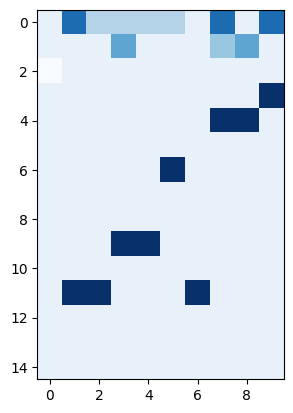

1


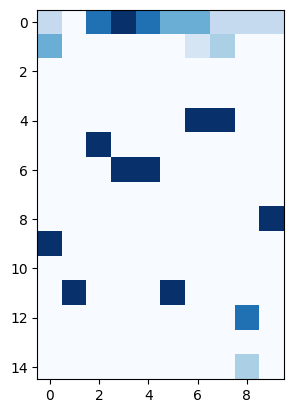

2


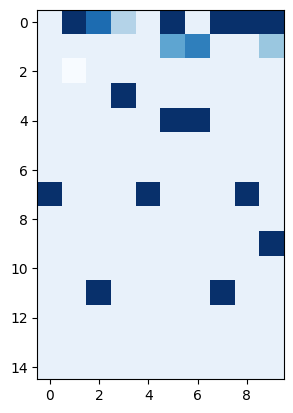

3


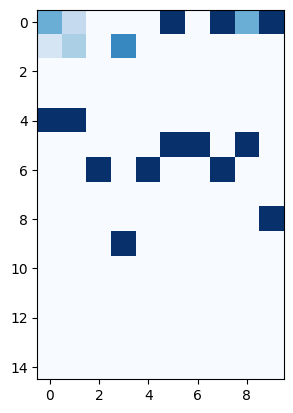

4


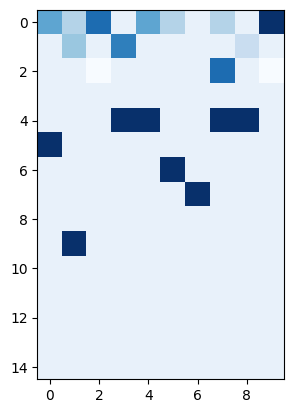

5


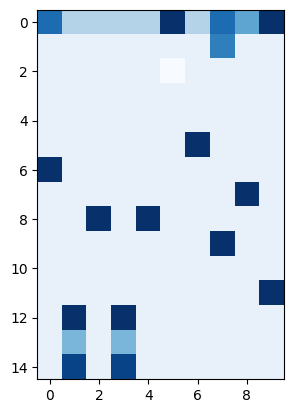

6


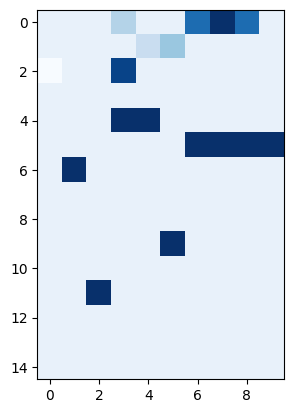

7


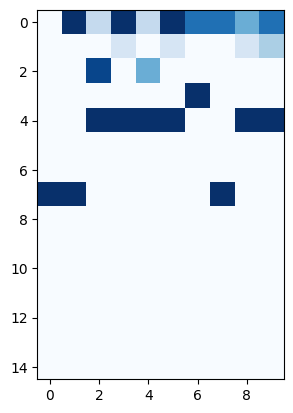

8


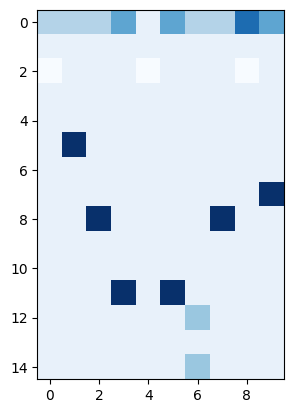

9


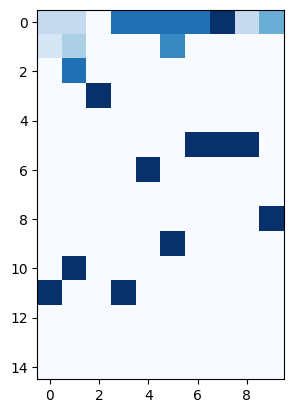

10


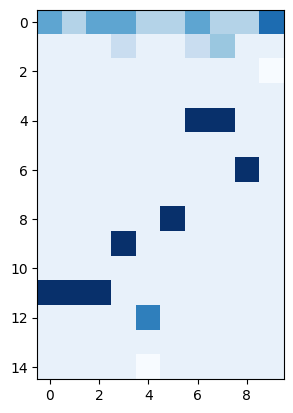

11


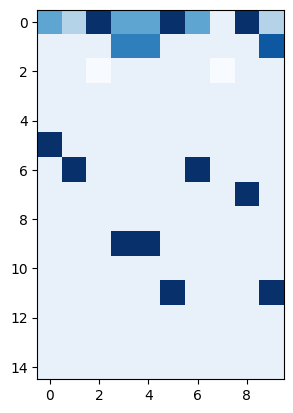

12


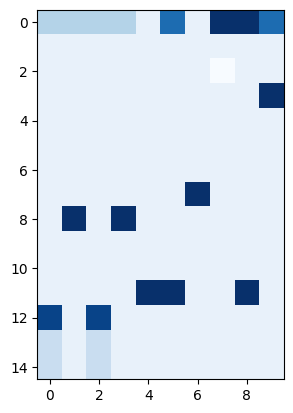

13


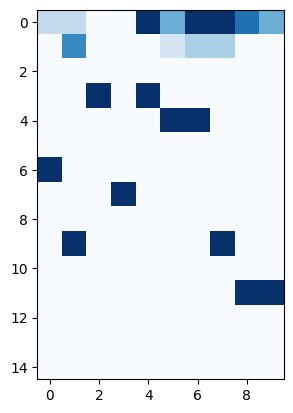

14


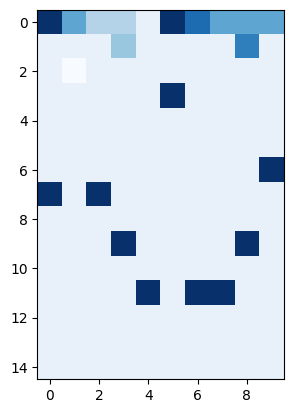

15


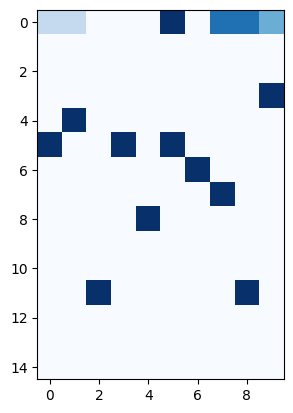

16


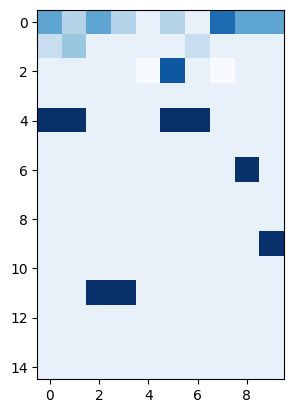

17


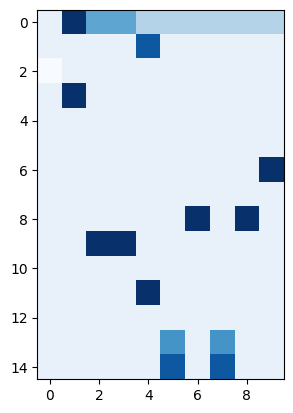

18


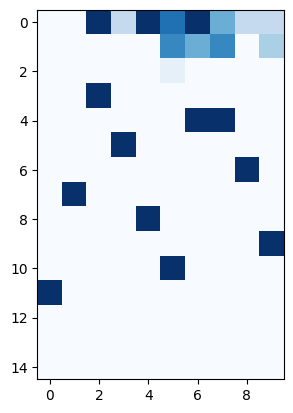

19


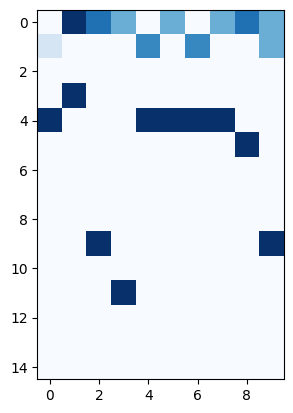

In [103]:
from ekenv import EKActionVecDefs
from ekenv import EKAgent

for i, h in enumerate(history_states):
    history_copy = h.copy().astype(np.float64)
    history_copy[:, EKActionVecDefs.PLAYER] /= EKAgent.MAX_PLAYER_VAL
    history_copy[:, EKActionVecDefs.POINTER] /= EKAgent.MAX_POINTER_VAL
    history_copy[:, EKActionVecDefs.TARGET_CARD] /= EKAgent.MAX_CARD_VAL
    history_copy[:,
        [EKActionVecDefs.FUTURE_1,
        EKActionVecDefs.FUTURE_2,
        EKActionVecDefs.FUTURE_3]
    ] /= EKAgent.MAX_CARD_VAL
    print(i)
    plt.imshow(history_copy.T, "Blues")
    # plt.xticks([0,1,2,3,4,5,6], ["deck", "disc. pile", "player 0", r"$\bf{player 1}$", "player 2", "player 3", "player 4"], rotation = 55)
    # plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], ["total","exploding kitten","defuse","attack","favor","nope","shuffle","skip","see future","cat a","cat b","cat c","cat d","cat e"])
    plt.show()

In [29]:
leuk = [17, 7, 15, 2]
card_states = [card_states[l] for l in leuk]

In [31]:
leukste = card_states[3]

4

In [32]:
leukste[0, 1] -= 1
leukste[5, 1] += 1

3


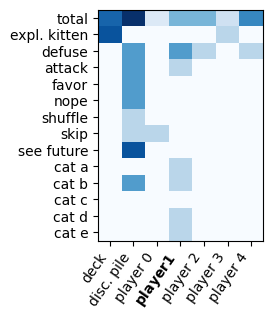

In [87]:
cards_copy = leukste.copy().astype(np.float64)
cards_copy[:, 0] /= 52
cards_copy[:, 1:14] /= 12
print(i)
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.imshow(cards_copy.T, "Blues", aspect=0.7)
plt.xticks([0,1,2,3,4,5,6], ["deck", "disc. pile", "player 0", r"$\bf{player 1}$", "player 2", "player 3", "player 4"], rotation = 55, ha="right")
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13], ["total","expl. kitten","defuse","attack","favor","nope","shuffle","skip","see future","cat a","cat b","cat c","cat d","cat e"])
fig.align_xlabels(100)
plt.show()
# plt.savefig("cards_input.svg", format="svg")

19


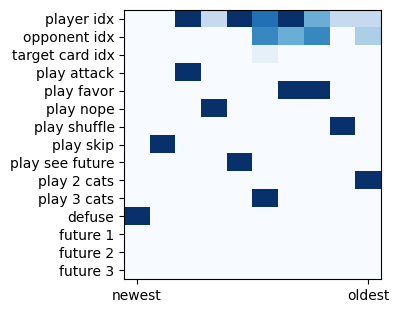

In [124]:
leukste = history_states[18]
history_copy = leukste.copy().astype(np.float64)
history_copy[:, EKActionVecDefs.PLAYER] /= EKAgent.MAX_PLAYER_VAL
history_copy[:, EKActionVecDefs.POINTER] /= EKAgent.MAX_POINTER_VAL
history_copy[:, EKActionVecDefs.TARGET_CARD] /= EKAgent.MAX_CARD_VAL
history_copy[:,
    [EKActionVecDefs.FUTURE_1,
    EKActionVecDefs.FUTURE_2,
    EKActionVecDefs.FUTURE_3]
] /= EKAgent.MAX_CARD_VAL
print(i)
fig = plt.gcf()
fig.set_size_inches(3.5,3.5)
plt.imshow(history_copy.T, "Blues", aspect=0.7)
plt.xticks([0, 9], ["newest", "oldest"])
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], [
    "player idx",
    "opponent idx",
    "target card idx",
    "play attack",
    "play favor",
    "play nope",
    "play shuffle",
    "play skip",
    "play see future",
    "play 2 cats",
    "play 3 cats",
    "defuse",
    "future 1",
    "future 2",
    "future 3",
])
plt.show()
# plt.savefig("history_input.svg", format="svg")